# table data를 활용한 간단한 EDA와 전처리

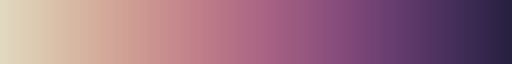

In [55]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

# 1. 데이터 불러오기

In [22]:
base_path = "C:\\Users\\user\\Desktop\\016_\\week3\\5"
data_path = os.path.join(base_path, 'heart_disease_v1.csv')

In [23]:
data = pd.read_csv(data_path)

In [24]:
data

,birth_year,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1956,M,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1982,M,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1978,F,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1963,M,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1962,F,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1962,F,0,140,241,0,1,123,1,0.2,1,0,3,0
299,1974,M,3,110,264,0,1,132,0,1.2,1,0,3,0
300,1951,M,0,144,193,1,1,141,0,3.4,1,2,3,0
301,1962,M,0,130,131,0,1,115,1,1.2,1,1,3,0


# 2. 데이터 살펴보기

아래는 데이터를 받으면 먼저 확인해야할 것입니다.

1. 컬럼 별 데이터의 형태 (Type)
2. 데이터 개수 (Shape)
3. 데이터 결측치 (Missing Value) 
4. 데이터 통계값 (Statistics)
5. 데이터의 분포 (Distribution)
6. 데이터의 예외값 (Outlier)

## 2-1 컬럼 설명 by kaggle


> `birth_year`: 출생년도 <br>
> `sex`: 성별(M = 남성, F = 여성)<br>
> `cp`: 흉통(1=전형적인 협심증, 2= 비전형 협심증, 3=비혈관통증, 4=무증상)<br>
> `trestbps`: 안정시 혈압<br>
> `chol`: 혈청 콜레스테롤(mg/dl)<br>
> `fbs`: 공복 혈당. 혈당이 120보다 큰 경우 1, 120 이하 0<br>
> `restecg`: 안정시 심전도 결과(0=정상, 1=ST-T파 이상, 2=좌심실 비대)<br>
> `thalach`: 최대 심박수<br>
> `exang`: 운동 유발 협심증(1=있다, 0=없다)<br>
> `oldpeak`: 휴식에 비해 운동으로 유발된 ST 우울증<br>
> `slope`: 피크 운동 ST 세그먼트 기울기(1=상승, 2=평평함, 3=하향 경사)<br>
> `ca`: 플로로소피로 착색된 주요 혈관의 수<br>
> `thal`:(3 = 정상, 6 = 고정된 결함, 7 = 가역적인 결함)<br>
> `target`: 심장병 유무 (1=있다, 0=없다)<br>


## 2-2 데이터 대략적으로 이해하기

In [25]:
data.tail()

,birth_year,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,1962,F,0,140,241,0,1,123,1,0.2,1,0,3,0
299,1974,M,3,110,264,0,1,132,0,1.2,1,0,3,0
300,1951,M,0,144,193,1,1,141,0,3.4,1,2,3,0
301,1962,M,0,130,131,0,1,115,1,1.2,1,1,3,0
302,1962,F,1,130,236,0,0,174,0,0.0,1,1,2,0


In [26]:
# 데이터의 전반적인 형태 체크
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   birth_year  303 non-null    int64  
 1   sex         303 non-null    object 
 2   cp          303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    int64  
 12  thal        303 non-null    int64  
 13  target      303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_year,303.0,1964.633663,9.082101,1942.0,1958.0,1964.0,1971.5,1990.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
slope,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0


In [28]:
# 결측값 확인
data.isna().sum()

birth_year    0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

## 2-3 categorical columns

In [32]:
# target 값 확인
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [33]:
#성별 sex
data['sex'].value_counts()

M    207
F     96
Name: sex, dtype: int64

In [34]:
# 흉통 cp
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [35]:
#공복혈당 fbs 
data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [36]:
#안정시 심전도 결과 restecg
data['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [37]:
#플로로소피로 착색된 주요 혈관의 수 ca
data['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

## 2-4 시각화 package 소개
- matplotlib

> 가장 기본이 되는 패키지입니다. <br>
> 다른 시각화 라이브러리를 사용하더라도 내부적으로는 matplotlibrary를 사용해서 그려집니다.<br>
> 그리려는 plot에 한글이 포함된 경우 글자가 깨지는 문제점이 있습니다.<br>
> 주피터 노트북 시작시 한글 폰트를 한번만 지정해주면 해결할 수 있습니다.<br>
> 그려진 plot을 바탕화면으로 드래그 하면 쉽게 이미지로 저장할 수 있습니다.<br>
> line, scatter, 컨투어, 서피트, bar chart, histogram 등 그릴 수 있습니다<br>

- seaborn

> 자동 집계 기능이 있어서 편리하게 시각화를 할 수 있습니다.<br>
> palette 기능을 통해 쉽게 원하는 색 조합을 적용할 수 있습니다.<br>
> palette: https://seaborn.pydata.org/tutorial/color_palettes.html

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunsl.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 2-5 앞서 살펴본 자료 시각화
### catagorical data

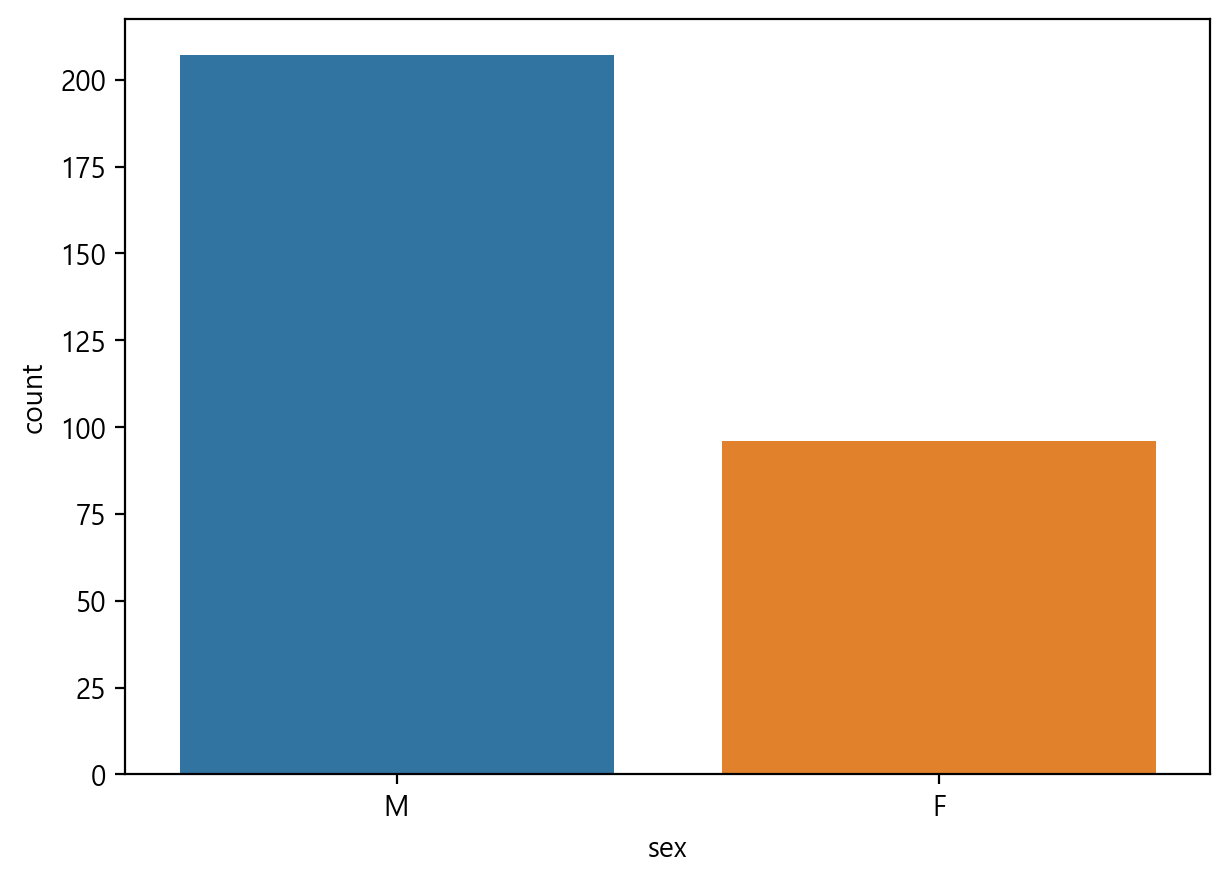

In [41]:
plt.figure(figsize=(7,5), dpi=200)
sns.countplot(data=data, x='sex')
plt.show()

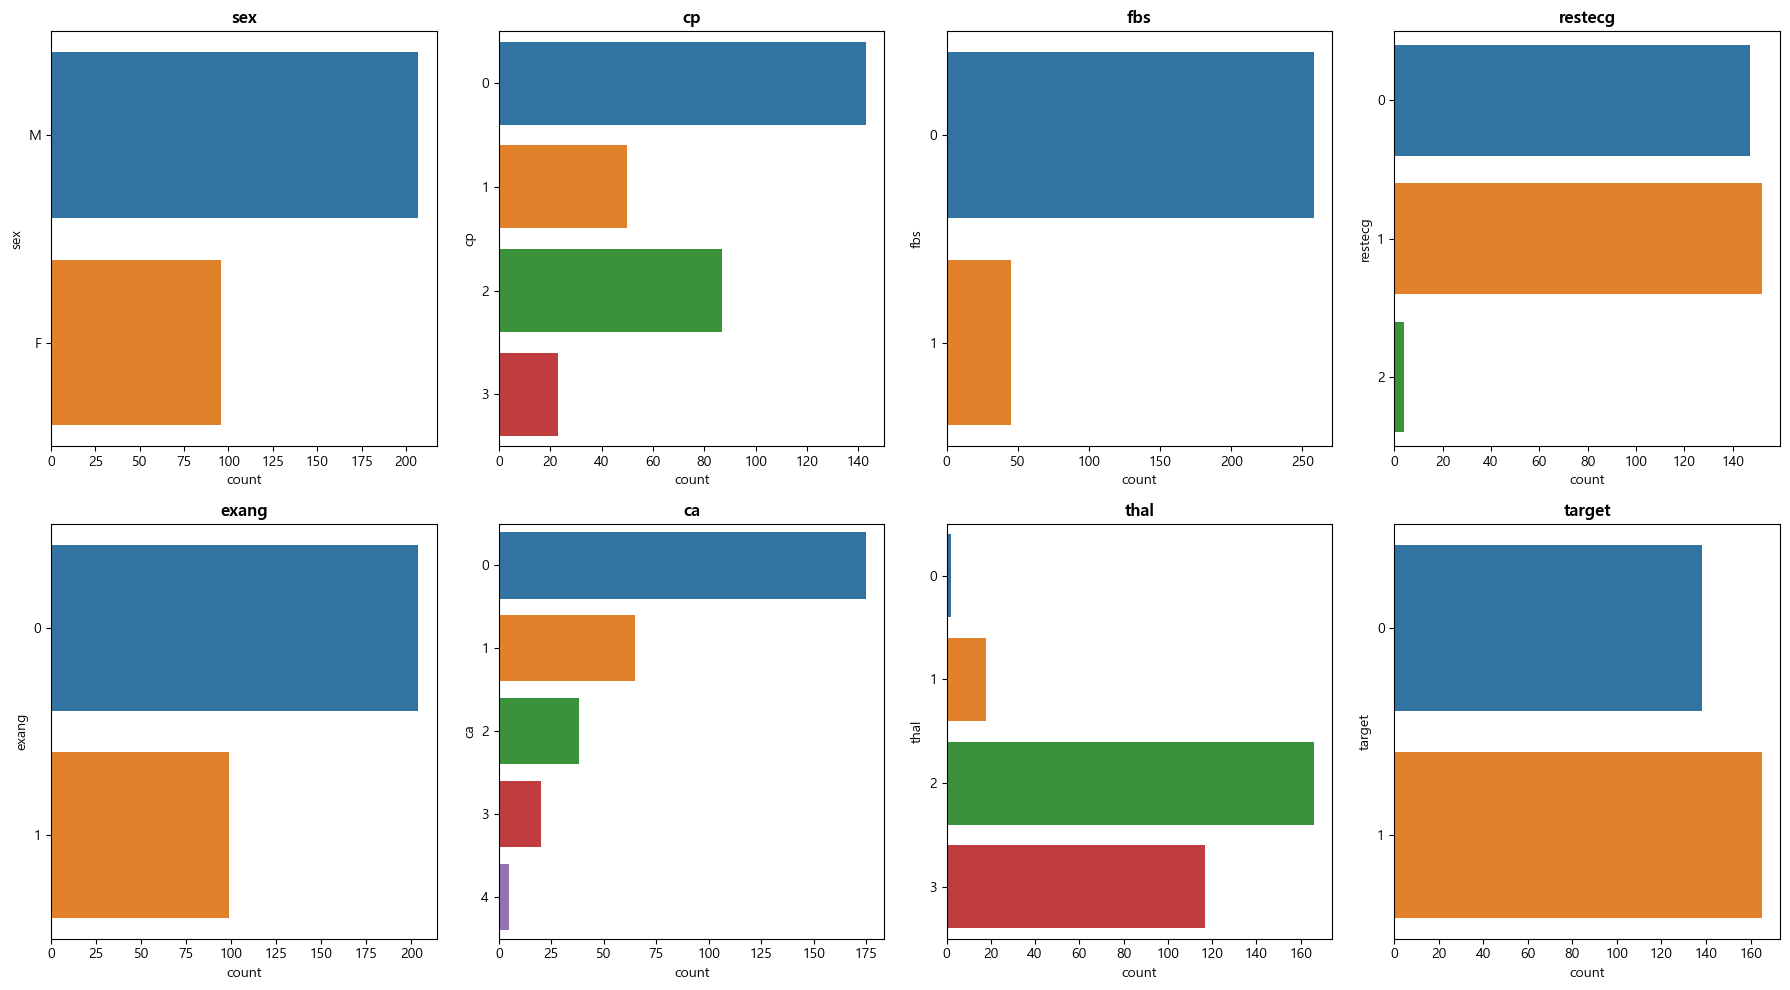

In [42]:
#한번에 그리는 방법

col_list = ['sex','cp','fbs','restecg','exang','ca','thal','target']

fig, ax = plt.subplots(2,4, figsize=(18,10), dpi=100) 
for col, ax in zip(col_list, ax.flatten()):
    sns.countplot(data=data, y=col, ax=ax) 
    ax.set_title(col, fontweight='bold')
fig.tight_layout() 
plt.show()

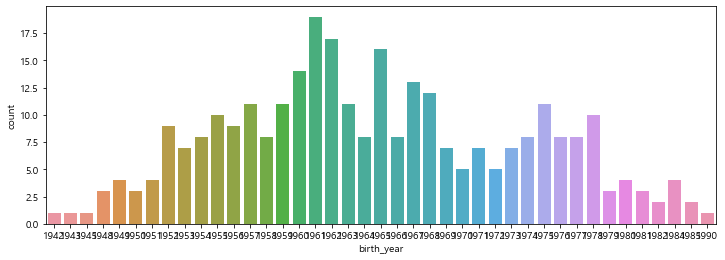

In [51]:
plt.figure(figsize=(12,4))
sns.countplot(data=data, x='birth_year')
plt.xticks(rotation=0)
plt.show()

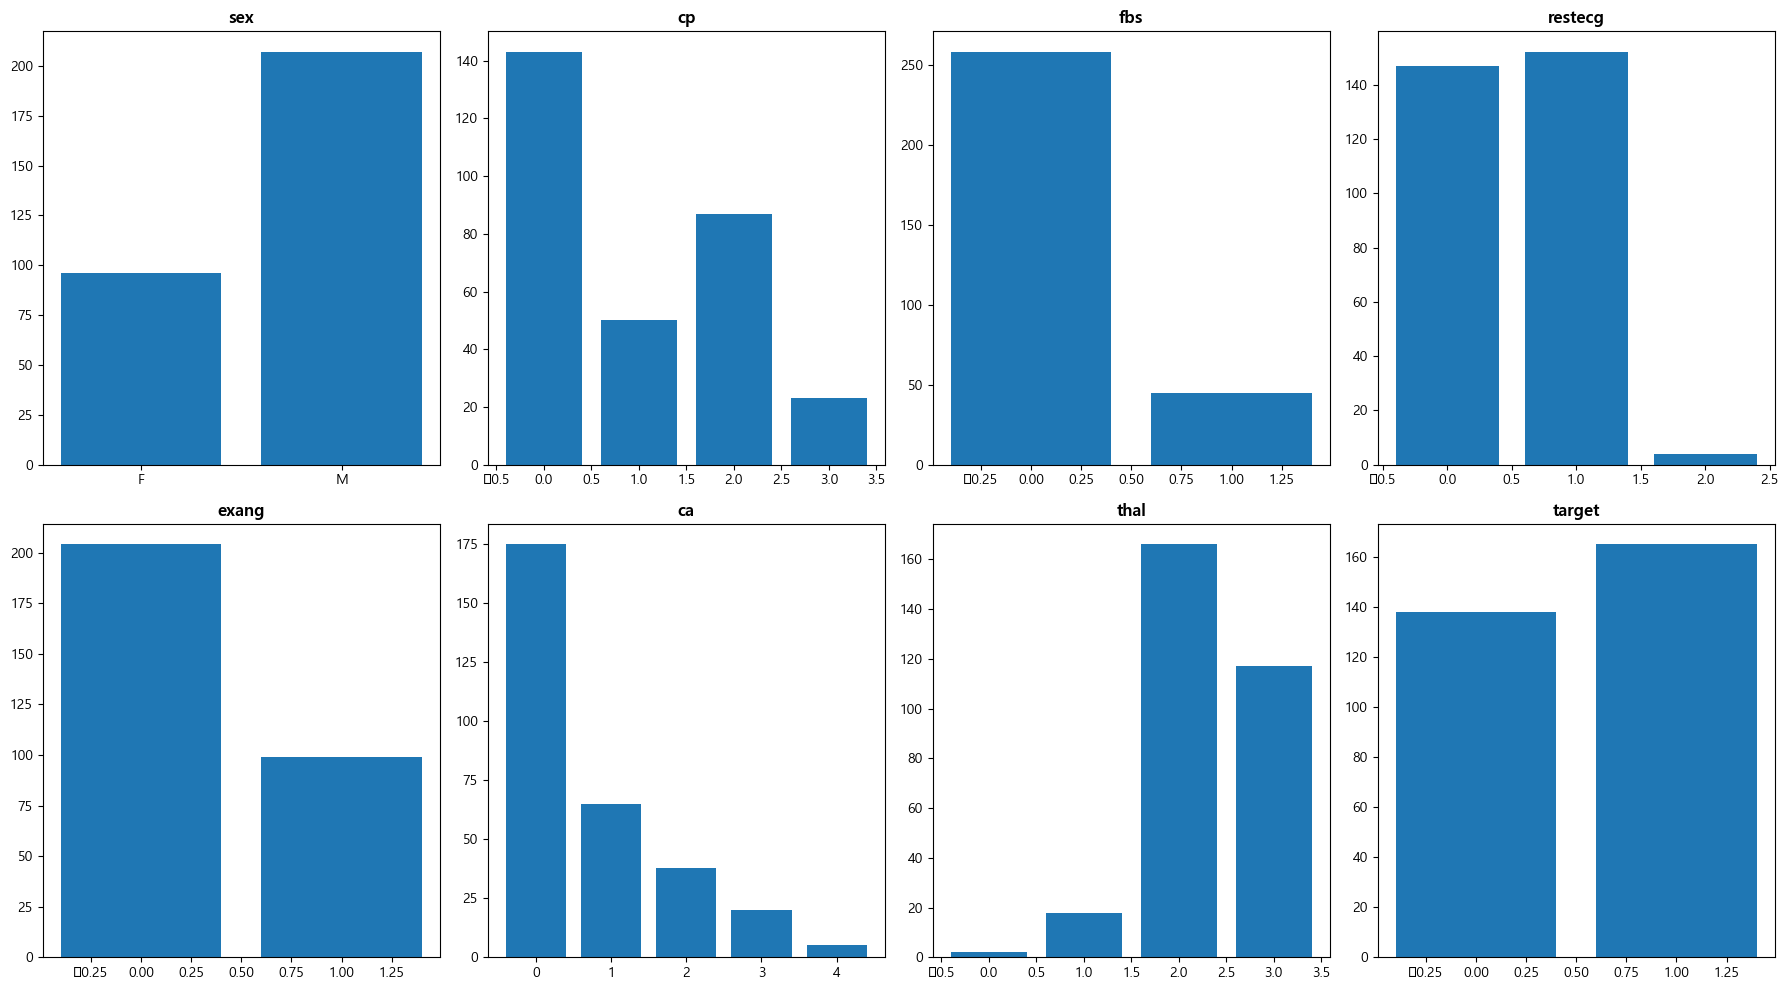

In [391]:
fig, ax = plt.subplots(2,4, figsize=(18,10), dpi=100) 
for col, ax in zip(col_list, ax.flatten()):
    tmp_cnt = data[col].value_counts().sort_index()
    ax.bar(tmp_cnt.index,tmp_cnt) 
    ax.set_title(col, fontweight='bold')
fig.tight_layout() 
plt.show()



### continuous data

In [33]:
data.head()

,birth_year,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1956,M,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1982,M,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1978,F,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1963,M,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1962,F,0,120,354,0,1,163,1,0.6,2,0,2,1


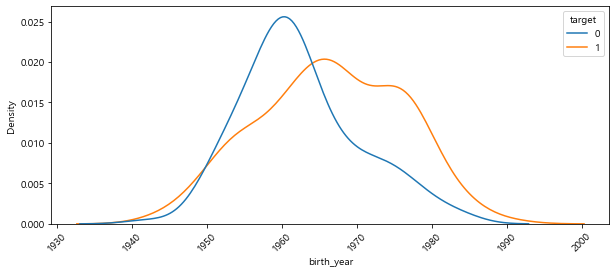

In [47]:
# 'birth_year', 'target' 'kdeplot'
plt.figure(figsize=(10,4))
sns.kdeplot(data=data, x='birth_year', hue='target')
plt.show()

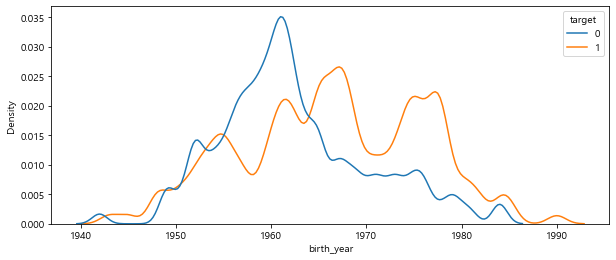

In [57]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=data, x='birth_year', hue='target', bw=0.1) # bw = 보정률
plt.show()

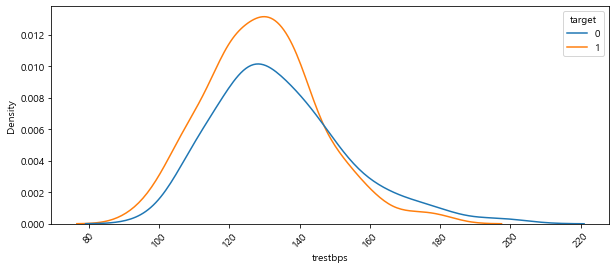

In [48]:
# trestbps 안정시 심박수
plt.figure(figsize=(10,4))
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.kdeplot(data=data, x='trestbps', hue='target')
plt.xticks(rotation=45)
plt.show()

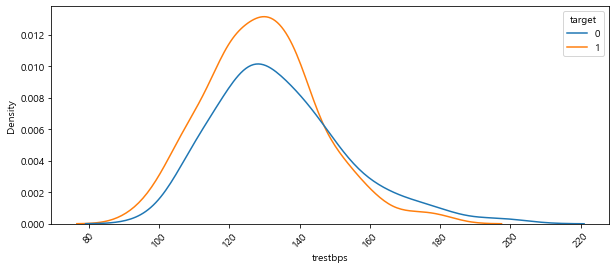

In [54]:
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
plt.figure(figsize=(10,4))
sns.kdeplot(data=data, x='trestbps', hue='target')
plt.xticks(rotation=45)
plt.show()

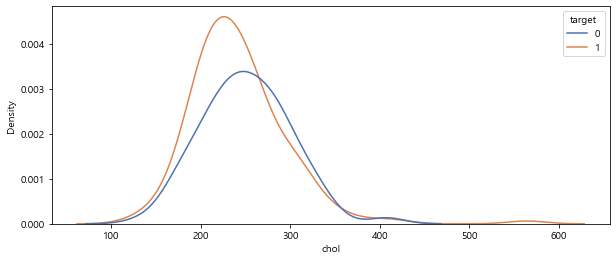

In [98]:
# chol 혈청 콜레스트롤


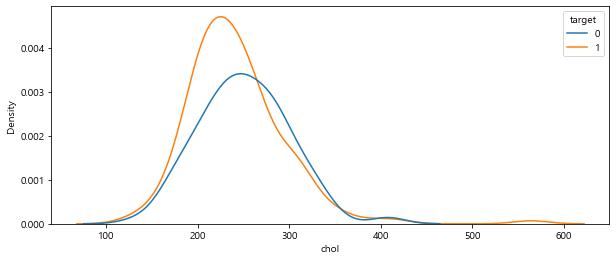

In [56]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=data, x='chol', hue='target')
plt.show()

## 2.6 Target에 따른 특성 차이

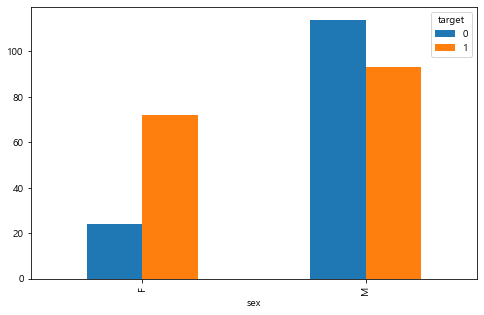

In [41]:
pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(8, 5))
plt.show()

In [70]:
# 심전도(restecg) 결과가 0인 것 중 target 개수 보기 (안정시 심전도 결과(0=정상, 1=ST-T파 이상, 2=좌심실 비대))
data[data['restecg'] == 0]['target'].value_counts()

0    79
1    68
Name: target, dtype: int64

In [49]:
# 심전도 그룹


restecg
0    0.462585
1    0.631579
2    0.250000
Name: target, dtype: float64

In [78]:
data.groupby('restecg')['target'].mean()

restecg
0    0.462585
1    0.631579
2    0.250000
Name: target, dtype: float64

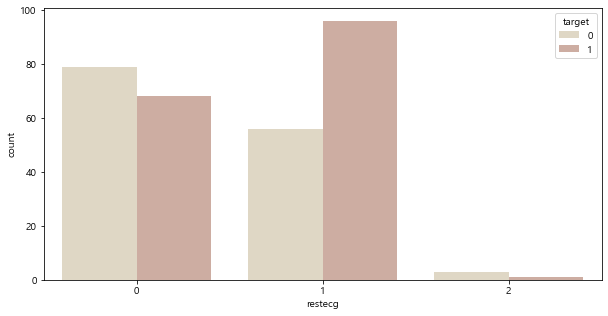

In [87]:
# restecg countplot
plt.figure(figsize=(10,5))
sns.set_palette("ch:s=-.2,r=.6")
sns.countplot(data=data, x='restecg', hue='target')
plt.show()

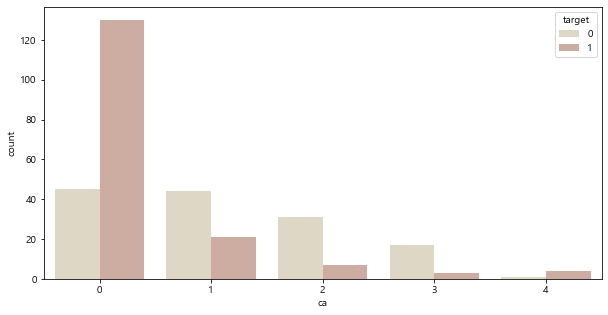

In [88]:
#ca 칼럼으로 같은 플랏 그려보기
# restecg countplot
plt.figure(figsize=(10,5))
sns.set_palette("ch:s=-.2,r=.6")
sns.countplot(data=data, x='ca', hue='target')
plt.show()

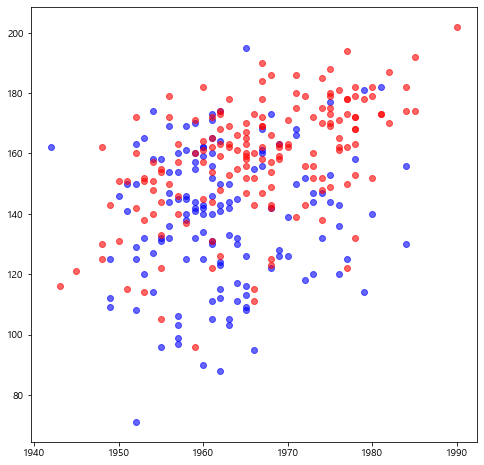

In [88]:
# 출생년도와 최대 심박수 (thalach)
plt.figure(figsize=(8,8))
plt.scatter(x=data.birth_year[data.target==0], y=data.thalach[data.target==0], c='blue', )
plt.scatter(x=data.birth_year[data.target==1], y=data.thalach[data.target==1], c='red', )
plt.show()

<Figure size 720x720 with 0 Axes>

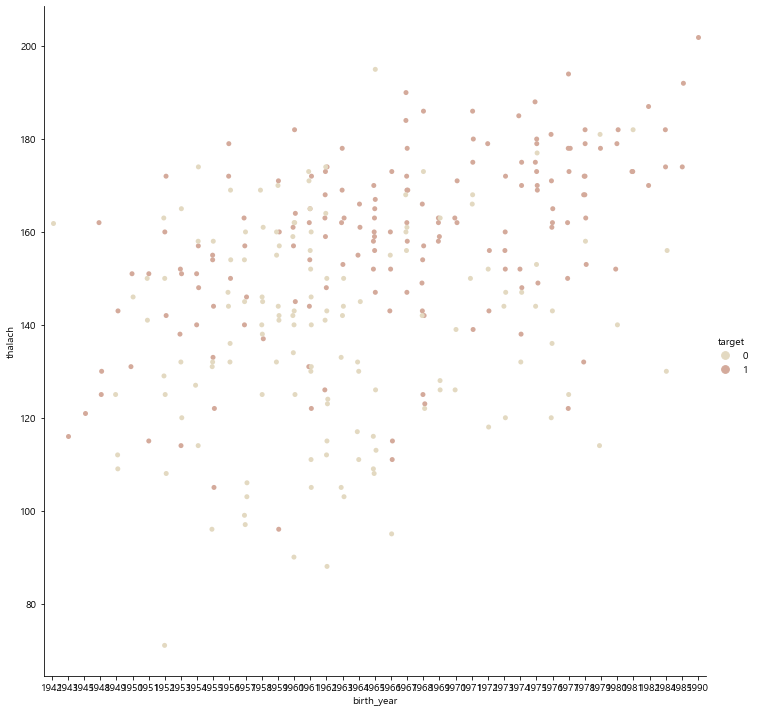

In [94]:
# sns 로 같은 플랏 그리기, catplot
plt.figure(figsize=(10,10))
sns.catplot(data=data, x='birth_year',  y='thalach', hue='target', height=10)

# 3. 통계분석

앞선 시각화를 보면, 심장병과 안정시 혈압이 큰 관계가 없어 보입니다.

심장병이 있는 집단과 없는 집단 간 안정시 혈압 평균에 통계적으로 유의미한 차이가 있는지 살펴보겠습니다.

## 3-1 정규성 검정

전통적인 통계 검정법들은 데이터의 분포를 정규분포로 가정하고 수행되기 때문에 데이터 자체의 정규성을 확인하는 검정이 필수적입니다.

중심극한정리에 의해 표본수가 30이상이 되면 데이터셋이 정규분포에 가까워지지만, 실제로 많은 데이터들을 분석하다보면 반드시 정규분포를 따르는 것은 아닙니다.

<b>정규성 검정의 종류</b>
- Shaprio-Wilks test
- Kolmogorove-Smirnov test
- Quantile-Quantile plot(QQ-plot)

의료 논문의 경우 Shaprio-Wilks test 를 많이 사용하므로 이번 시간에는 Shaprio-Wilks test를 해보겠습니다.

> Shaprio-Wilks test <br>
> - 귀무가설 H0: 데이터셋이 정규분포를 따른다.
> - 대립가설 H1: 데이터셋이 정규분포를 따르지 않는다.

In [250]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
from scipy.stats import shapiro
shapiro(data['trestbps'])

ShapiroResult(statistic=0.965917706489563, pvalue=1.4580031120203785e-06)

p-value 0.05이하로 귀무가설을 기각하고 대립가설을 채택합니다.

이 경우 비모수적인 방법을 통해 평균 차이를 비교합니다.

## 3-2 Mann-Whitney U test

서로 다른 두 집단 차이를 분석하는 가장 일반적인 방법인 T-Test와 다르게, 

자료의 수치가 <b>순위 척도(ordinal scale) 또는 정규성 만족이 안되는 경우</b> 사용하는 방법입니다.

이 데이터의 `trestbps` 컬럼을 가지고 분석해보겠습니다.

> 심장병이 있는 그룹과 없는 그룹의 안정시 혈압 평균에 유의미한 차이가 있는지 살펴보겠습니다.

<div class="alert alert-block alert-warning">
    <b>Quiz</b> 먼저 심장병이 있는 그룹의 평균 혈압과, 심장병이 없는 그룹의 평균 혈압을 구해보세요
</div>

In [95]:
data[data['target']==0]['trestbps'].mean()

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64

In [96]:
data[data['target']==0]['trestbps'].mean()

134.3985507246377

In [97]:
data[data['target']==1]['trestbps'].mean()

129.3030303030303

심장병이 있는 그룹의 평균 혈압은 129.30이며, 없는 그룹은 134.398 입니다.

In [98]:
from scipy.stats import mannwhitneyu
mannwhitneyu(data[data['target']==0]['trestbps'],data[data['target']==1]['trestbps'])

MannwhitneyuResult(statistic=12985.5, pvalue=0.03465244526020498)

p-value 0.05이하로 두 집단간의 평균 혈압이 다르다고 볼 수 있습니다.

## 3-3 t-test
- 집단간 평균 차이를 위한 검정방법 입니다.
- 서로 독립된 두 집단 간의 평균 차이가 있는지를 확인하기 위해서 사용합니다

정규성이 만족되는 경우 사용하는 통계 검정 방법이지만,
같은 내용을 정규성 만족이 된다고 가정하고 사용해보겠습니다.


먼저 t-test를 수행시 등분산성이 만족되어야 합니다.

> 등분산 검정<br>
> - 귀무가설 H0: 데이터셋의 분산이 같다(등분산이다)
> - 대립가설 H1: 데이터셋의 분산이 같지 않다(등분산이 아니다)<br><br>
> 등분산선 검정은 Bartlett's test와 Levene's test 등이 있으나, 본 예제에서는 Levene's test 를 수행하겠습니다.

> t-test <br>
> - 귀무가설 H0: 두 집단의 모평균이 같다
> - 대립가설 H1: 두 집단의 모평균이 다르다

In [410]:
from scipy.stats import levene
levene(data[data['target']==0]['trestbps'],data[data['target']==1]['trestbps'])

LeveneResult(statistic=1.8569845481574663, pvalue=0.17399187776048558)

p-value가 0.05 이상이므로 귀무가설을 채택합니다. 따라서 두 집단은 등분산이라고 할 수 있습니다..

따라서 t-test의 `equal_var`을 True로 입력합니다

In [163]:
import scipy.stats

In [411]:
scipy.stats.ttest_ind(data[data['target']==0]['trestbps'],data[data['target']==1]['trestbps'], equal_var=True,
#                       alternative='greater'
                     )

Ttest_indResult(statistic=2.5412927171039, pvalue=0.011546059200233312)

p-value < 0.05 이므로 귀무가설을 기각하고 대립가설을 채택합니다.

따라서 심장병이 있는 집단과 없는 집단 간의 안정시 혈압 평균은 다르다고 볼 수 있습니다.


<div class="alert alert-block alert-warning">
    <b>Quiz</b>  심장병이 있는 그룹과 없는 그룹 간의 혈청 콜레스테롤 양의 차이가 있는지 알아보겠습니다.<br><br>
     chol 컬럼을 사용하여 분석해보세요
</div>


In [99]:
data[data['target']==0]['chol'].mean()

251.08695652173913

In [100]:
data[data['target']==1]['chol'].mean()

242.23030303030302

In [101]:
mannwhitneyu(data[data['target']==0]['chol'],data[data['target']==1]['chol'])

MannwhitneyuResult(statistic=12980.5, pvalue=0.03571518201137642)

In [103]:
import scipy.stats
scipy.stats.ttest_ind(data[data['target']==0]['chol'],data[data['target']==1]['chol'], equal_var=True,
#                       alternative='greater'
                     )

Ttest_indResult(statistic=1.4842450762526977, pvalue=0.13879032695600638)

In [106]:
shapiro(data['chol'])

ShapiroResult(statistic=0.9468814134597778, pvalue=5.364669153351542e-09)

# 3. Data encoding

Python 은 텍스트를 스스로 이해하여 의미를 도출할 수 없습니다.

따라서 텍스트로 이뤄진 데이터의 경우, python이 인식할 수 있는 형태로 바꿔줘야 합니다.

`sex` 칼럼은 'M', 'F' 로 이뤄져 있습니다.<br>
이를 M=0, F=1로 바꿔보겠습니다

In [119]:
data.head()

,birth_year,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1956,NaN,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1982,NaN,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1978,NaN,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1963,NaN,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1962,NaN,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
data['sex'].value_counts()

M    207
F     96
Name: sex, dtype: int64

In [193]:
#map
data['sex'].fillna(0,inplace=True)
data['sex']

0      0
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    0
301    0
302    0
Name: sex, Length: 303, dtype: object

# 4. train- test 분리

머신러닝, 딥러닝 모델을 학습시키기 전 데이터를 크게 세가지로 분리합니다.

* training set: 모델의 학습을 위해 사용되는 데이터
* validation set: 모델의 학습 과정에서 성능을 확인하고, 하이퍼 파라미터 튜닝시 사용
* test set: 생성된 모델의 예측성능을 평가하는데 사용됨

overfitting(과적합)을 방지하기 위해 주어진 전체 데이터를 모델 학습시 다 활용하지 않습니다.

활용성 높은 모델은 학습에 사용되지 않은 데이터에 대한 예측을 잘해야 합니다.

주어진 데이터에 치중하여 학습하는 경우 다른 패턴을 가진 데이터에 대해 예측할 수 없기에 초기에 데이터 분리하는 과정이 중요합니다.

정확한 성능을 파악하기 위해 학습시 test set에 포함된 데이터 정보는 절대로 활용하지 않아야 합니다. 


- 도메인에 따라 랜덤한 방법이 아닌 다른 방법을 사용할 수도 있음
- Sklearn의 대표적인 함수는 `train_test_split`


> - classification의 경우 랜덤하게 분리 시 test 데이터에만 심장병 환자가 몰려있는 문제가 생길 수 있음<br>
> - 분할시 target이 적절히 나뉠 수 있게 옵션을 부여함<br>
> - train_test_split 함수의 `stratify` 를 통해 이를 조절할 수 있음<br>
> - 수행할 때마다 결과가 달라지므로 `random_state` 로 seed를 고정하여 사용함
> - `test_size`로 test set의 비율 조정 가능

In [136]:
from sklearn.model_selection import train_test_split

In [135]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [146]:
#분리
train, test = train_test_split(data,test_size=0.2, random_state=42, stratify=data['target'])

In [147]:
print('training set: ', train.shape, 'test set: ', test.shape)

training set:  (242, 14) test set:  (61, 14)


In [148]:
train['target'].value_counts()

1    132
0    110
Name: target, dtype: int64

In [149]:
test['target'].value_counts()

1    33
0    28
Name: target, dtype: int64

In [129]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# 5. 데이터 스케일링

## 5-1. 스케일링을 하는 이유

변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target 에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.

서로 다른 변수 값의 범위를 일정한 수준으로 맞추는 작업을 특징 스케일링이라고 합니다.

대표적인 스케일링 방법으로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링, z-정규화를 이용한 Standard 스케일링이 있습니다.

<div class="alert alert-block alert-danger">
    <b> 스케일링은 변수의 분포를 변경하지 않습니다.</b>
</div>

## 5-2. Min-Max Scaling

- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됨 <br> 
- 최댓값을 1, 최솟값을 0으로 변경

수식을 직관적으로 이해해보면, X에 존재하는 어떤 가장 작은 값 x <sub>m</sub>에 대해서 x <sub>m</sub>는 Min(X) 값입니다.

스케일링 후 x<sub>m</sub>은 0이되고, X에 존재하는 어떤 가장 큰 값x <sub>M</sub>은 분모의 식과 같아지므로 1이 됩니다.

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$ 

<div class="alert alert-block alert-warning">
    <b>Quiz</b> numpy를 활용하여 trestbps 컬럼을 스케일링 해보세요
</div>

In [183]:
 X_MinMax = ((data['trestbps'] - data['trestbps'].min) / (data['trestbps'].max - data['trestbps'].min))

TypeError: unsupported operand type(s) for -: 'int' and 'method'

In [199]:
X_MinMax

0      0.481132
1      0.339623
2      0.339623
3      0.245283
4      0.245283
         ...   
298    0.433962
299    0.150943
300    0.471698
301    0.339623
302    0.339623
Name: trestbps, Length: 303, dtype: float64

직접 구현도 어렵지 않지만, `Sklearn`에서 Min-Max Scaler는 preprocessing 패키지 사용해보겠습니다.

Scaling 과정을 마친 후에는 데이터의 describe를 확인하여 scaling이 잘 이뤄졌는지 확인해야합니다.



<div class="alert alert-block alert-danger">
    <b> 스케일링은 train 데이터만을 이용해서 진행합니다.</b>
</div>

In [198]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
mm = MinMaxScaler()
train.iloc[:,[0,3,4,7,9]] = mm.fit_transform(train.iloc[:,[0,3,4,7,9]])
test.iloc[:,[0,3,4,7,9]] = mm.transform(test.iloc[:,[0,3,4,7,9]])



In [197]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_year,242.0,0.473140,0.190694,0.0,0.333333,0.447917,0.625000,1.0
sex,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,242.0,0.942149,1.008656,0.0,0.000000,1.000000,2.000000,3.0
trestbps,242.0,0.355723,0.169759,0.0,0.245283,0.339623,0.433962,1.0
chol,242.0,0.420086,0.169072,0.0,0.301237,0.402827,0.522085,1.0
fbs,242.0,0.140496,0.348221,0.0,0.000000,0.000000,0.000000,1.0
restecg,242.0,0.545455,0.531185,0.0,0.000000,1.000000,1.000000,2.0
thalach,242.0,0.544947,0.192789,0.0,0.432018,0.561404,0.684211,1.0
exang,242.0,0.338843,0.474297,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,242.0,0.172887,0.194558,0.0,0.000000,0.129032,0.290323,1.0


In [195]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_year,61.0,0.465164,0.184612,0.125000,0.354167,0.479167,0.583333,0.875000
sex,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,61.0,1.065574,1.123519,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,61.0,0.351840,0.148400,0.056604,0.245283,0.339623,0.433962,0.716981
chol,61.0,0.444303,0.231385,0.081272,0.282686,0.416961,0.554770,1.547703
fbs,61.0,0.180328,0.387651,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,61.0,0.459016,0.502453,0.000000,0.000000,0.000000,1.000000,1.000000
thalach,61.0,0.524159,0.231417,-0.149123,0.333333,0.596491,0.657895,0.894737
exang,61.0,0.278689,0.452075,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,61.0,0.147012,0.154707,0.000000,0.000000,0.129032,0.225806,0.580645


## 5-3 Standard Scaling

데이터를 통계적으로 표준정규분포화 시키는 방법입니다.

통계에서 언급하는 `Z-Score Normalization` 를 말합니다. 

쉽게 말해 데이터를 평균:0, 분산:1 인 정규 분포로 만드는 방법입니다. 


$$ z = {{x - \mu} \over {\sigma}} $$
<br>
$$ \mu : 데이터의\ 평균,\ mean(X) $$
$$ \sigma : 데이터의\ 표준편차, \ std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$

sklearn.preprocessing 의 StandardScaler 를 사용하여 쉽게 할 수 있습니다.

In [169]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(train.drop(columns=['target']))
X_test = ss.transform(test.drop(columns=['target']))

데이터의 `sex`, `cp`,`restecg`, `slope`, `ca`, `thal` 의 경우, 

범주형 데이터로 데이터에서 이미 label encoding이 적용되어있습니다.

따라서 이 값들은 scaling에서 제외하고 사용해보겠습니다.

추후 해당 칼럼은 one-hot encoding으로 변환하여 사용하는 것도 가능합니다.

In [201]:
train.columns

Index(['birth_year', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [202]:
train.iloc[:,[0,3,4,7,9]] 
test.iloc[:,[0,3,4,7,9]] 

,birth_year,trestbps,chol,thalach,oldpeak
179,0.416667,0.528302,0.530035,0.210526,0.096774
197,0.208333,0.292453,0.452297,0.657895,0.032258
285,0.645833,0.433962,0.653710,0.280702,0.290323
194,0.354167,0.433962,0.208481,0.587719,0.483871
188,0.562500,0.433962,0.378092,0.657895,0.096774
...,...,...,...,...,...
14,0.395833,0.528302,0.554770,0.649123,0.161290
4,0.416667,0.245283,0.805654,0.657895,0.096774
224,0.479167,0.150943,0.399293,0.333333,0.451613
202,0.395833,0.528302,0.508834,0.201754,0.129032


In [212]:
train['sex'].fillna(0,inplace=True)
test['sex'].fillna(0, inplace=True)

# 6. 모델 학습

다양한 분류기가 있지만 이번 시간에는 RandomForestClassifier를 사용하여 실습을 진행해보겠습니다.

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
# randomforest classifier 객체 생성
model_rf = RandomForestClassifier(random_state=42,
                                 )
#학습 수행
model_rf.fit(train.drop(columns=['target']), train['target'])

#평가용 데이터로 예측결과 반환
pred = model_rf.predict(test.drop(columns=['target']))

In [214]:
pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [189]:
test['target'].values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

# 7. 평가방법

머신러닝은 특징 추출, 모델 학습, 예측, 그리고 평가의 프로세스로 구성됩니다.

성능 평가 방법은 현재 예측하고자 하는 문제가 분류인지, 회귀인지에 따라 달라집니다.

## 7-1 classification vs regression

> - classification: 0,1 과 같은 이산형(discrete) 값을 예측하는 경우
> - regression: 연속형(continuous) 값을 예측하는 경우

## 7-2 classification의 평가방법

전체 데이터 중 모델이 맞춘 데이터의 개수를 의미하는 정확도(accuracy)를 가장 좋은 평가 지표로 생각할 수 있지만, 데이터의 클래스 분포가 불균형한 경우에는 좋은 지표로 보기 어렵습니다.

데이터와 분석 목적에 적합한 평가 방법을 사용해야 합니다.

1. Confusion Matrix(오차 행렬)<br>
    Accuracy(정확도)<br>
    Sensitivity(=recall, 민감도)<br>
    PPV(=Precision, 정밀도)<br>
    Specificity(특이도)<br>
2. F1 Score
3. ROC AUC

### 7-2-1 Confusion Matrix
<img src="https://i.imgur.com/MvapmPv.png[/img]">


<br><br>Accuracy(정확도): 전체 예측값 중 맞게 예측한 비율<br>
$$ACC = \frac{TP+TN}{TP+TN+FP+FN}$$
<br><br>
Sensitivity (recall, 민감도, 재현율) : 실제 양성인 것 중에 맞게 예측한 비율<br>
$$SEN = \frac{TP}{TP+FN}$$
<br><br>
Specificity(특이도): 실제 음성인 것 중에 맞게 예측한 비율<br>
$$SPE = \frac{TN}{FP+TN}$$
<br><br>
Positive Predictive Value (PPV, precision, 정밀도): 예측을 양성으로 한 것 중에 실제로 양성인 비율<br>
$$PPV = \frac{TP}{TP+FP}$$
<br><br>
Negative Predictive Value (NPV): 예측을 음성으로 한 것 중에 실제로 음성인 비율<br>
$$NPV = \frac{TN}{FN+TN}$$



<div class="alert alert-block alert-warning">
    <b>Quiz</b> numpy를 활용하여 앞서 구한 예측값(pred)의 정확도를 구해보세요.
</div>

0.819672131147541

scikit-learn 모듈을 사용하여 손쉽게 계산할 수 있습니다.

In [216]:
from sklearn.metrics import accuracy_score

In [219]:
accuracy_score(test['target'], pred)

0.7704918032786885

<b> confusion matrix의 경우 sklearn의 모듈을 통해 쉽게 구할 수 있습니다.</b>

In [220]:
from sklearn.metrics import confusion_matrix

In [221]:
confusion_matrix(test['target'], pred)

array([[17, 11],
       [ 3, 30]], dtype=int64)


<div class="alert alert-block alert-warning">
    <b>Quiz</b> 구한 confusion matrix에서 위의 지표 4개를 구해보세요
</div>

In [339]:
#accuracy


In [337]:
#recall


In [340]:
#specificity


In [338]:
#precision


In [225]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [223]:
recall_score(test['target'], pred)

0.9090909090909091

In [224]:
precision_score(test['target'], pred)

0.7317073170731707

In [226]:
f1_score(test['target'], pred)

0.8108108108108109

### 7-2-2 F1-Score
정밀도와 재현율을 결합한 지표입니다. 

정밀도와 재현율이 어느 한 방향으로 치우치지 않고 균형 있게 높은 값을 가질수록 높은 값을 가지게 됩니다.
- PPV (Precison)과 Sensitivity(recall) 은 모두 모델이 양성이라고 예측한 것과 관련 있으나, 관점이 다름
- 서로 상호보완적인 관계
- 따라서 이를 보완하기 위해 둘의 조화 평균을 구함
- Accuracy와 달리 불균형한 클래스에서도 사용하기 좋음
- sklearn.metrics의 f1_score를 이용해 계산가능


$$ F1 \ score = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} $$
<br><br>
$$F1 \ score = \frac{2*recall* precision}{recall+precision}$$

In [199]:
from sklearn.metrics import f1_score

f1_score(test['target'], pred)

0.8493150684931509

### 7-2-3 AUC (Area under the ROC Curve)
classification에서 확률을 예측하는 경우,

임계값에 따라서 민감도와 특이도가 변하게 됩니다.

이때 달라지는 모든 경우에 대한 대략적인 모델의 성능을 알고 싶을 때 사용하는 방법입니다.

- ROC-Curve: 여러 임계값을 기준으로 sensitivity의 fallout 변화를 시각화
- ROC-Curve의 그래프 아래 면접 값을 계산한 것이 AUC
- AUC의 최대값은 1이며, (0,1)지점에 가까워질수록 분류가 잘된 모델 

실습을 위해서는 예측 결과를 <b>확률</b>로 구해야합니다.

In [227]:
# randomforest classifier 객체 생성
model_rf = RandomForestClassifier(random_state=42,
                                 )
#학습 수행
model_rf.fit(train.drop(columns=['target']), train['target'])

#평가용 데이터로 예측결과 반환
pred = model_rf.predict_proba(test.drop(columns=['target']))

In [230]:
pred

array([[0.83, 0.17],
       [0.65, 0.35],
       [0.98, 0.02],
       [0.32, 0.68],
       [0.35, 0.65],
       [0.83, 0.17],
       [0.11, 0.89],
       [0.78, 0.22],
       [0.19, 0.81],
       [0.34, 0.66],
       [0.68, 0.32],
       [0.21, 0.79],
       [0.83, 0.17],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.12, 0.88],
       [0.11, 0.89],
       [0.31, 0.69],
       [0.32, 0.68],
       [0.41, 0.59],
       [0.2 , 0.8 ],
       [0.76, 0.24],
       [0.24, 0.76],
       [0.37, 0.63],
       [0.23, 0.77],
       [0.97, 0.03],
       [0.62, 0.38],
       [0.3 , 0.7 ],
       [0.81, 0.19],
       [0.3 , 0.7 ],
       [0.76, 0.24],
       [0.01, 0.99],
       [0.4 , 0.6 ],
       [0.86, 0.14],
       [0.89, 0.11],
       [0.53, 0.47],
       [0.49, 0.51],
       [0.11, 0.89],
       [0.01, 0.99],
       [0.5 , 0.5 ],
       [0.35, 0.65],
       [0.09, 0.91],
       [0.  , 1.  ],
       [0.37, 0.63],
       [0.78, 0.22],
       [0.38, 0.62],
       [0.14, 0.86],
       [0.31,

In [229]:
pred[:,1]

array([0.17, 0.35, 0.02, 0.68, 0.65, 0.17, 0.89, 0.22, 0.81, 0.66, 0.32,
       0.79, 0.17, 0.77, 0.84, 0.88, 0.89, 0.69, 0.68, 0.59, 0.8 , 0.24,
       0.76, 0.63, 0.77, 0.03, 0.38, 0.7 , 0.19, 0.7 , 0.24, 0.99, 0.6 ,
       0.14, 0.11, 0.47, 0.51, 0.89, 0.99, 0.5 , 0.65, 0.91, 1.  , 0.63,
       0.22, 0.62, 0.86, 0.69, 0.57, 0.82, 0.57, 0.94, 0.69, 0.04, 0.95,
       0.81, 0.68, 0.64, 0.  , 0.12, 1.  ])

random forest의 predict_proba를 사용하면 예측값이 0일 확률과 1일 확률을 반환합니다.

이 중 예측값이 1일 확률인 지표를 pred에 저장합니다.

In [233]:
from sklearn.metrics import roc_auc_score, roc_curve

In [235]:
roc_auc_score(test['target'], pred)

ValueError: y should be a 1d array, got an array of shape (61, 2) instead.

In [234]:
fper, tper, thresholds = roc_curve(test['target'], pred)

ValueError: y should be a 1d array, got an array of shape (61, 2) instead.

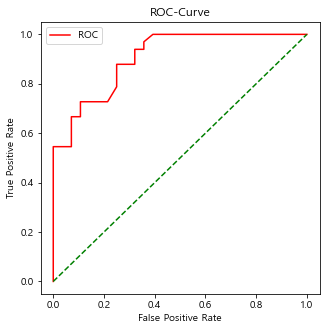

In [183]:
plt.figure(figsize=(5,5))
plt.plot(fper, tper, color='red',label='ROC')

plt.plot([0,1],[0,1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend()
plt.show()

In [211]:
roc_auc_score(test['target'], pred)

0.9063852813852814

# 8. overfitting & underfitting

앞 모델에서 train auc를 계산해보면 1.0으로 모두 완벽하게 예측하는 것을 확인할 수 있습니다.

그러나 test auc 의 경우 train에 비해 모델이 잘 작동하지 못하고 있습니다.


<img src=https://miro.medium.com/max/1136/1*x5YbWf3JhZIPr8veio_Bug.jpeg>

In [241]:
# randomforest classifier 객체 생성
model_rf = RandomForestClassifier(random_state=42,
                                 )
#학습 수행
model_rf.fit(train.drop(columns=['target']), train['target'])

oof = model_rf.predict_proba(train.drop(columns=['target']))[:,1]
#평가용 데이터로 예측결과 반환
pred = model_rf.predict_proba(test.drop(columns=['target']))[:,1]


In [233]:
roc_auc_score(train['target'], oof)

1.0

In [234]:
roc_auc_score(test['target'], pred)

0.9063852813852814

모델이 test set을 더 잘 예측하게 만들기 위해 

test set의 성능을 확인하는 과정을 반복하며 하이퍼파라미터 튜닝을 하는 경우, 

고정된 test set에만 잘 동작하는 모델이 만들어질 가능성이 높습니다.

결국 앞서서 과적합을 피하기 위해 test set를 분리한 과정이 의미가 없어집니다.

In [284]:
model_rf = RandomForestClassifier(random_state=42,
                                  n_estimators=100,
                                 )
#학습 수행
model_rf.fit(train.drop(columns=['target']), train['target'])

oof = model_rf.predict_proba(train.drop(columns=['target']))[:,1]
#평가용 데이터로 예측결과 반환
pred = model_rf.predict_proba(test.drop(columns=['target']))[:,1]

In [285]:
roc_auc_score(train['target'], oof)

0.9514462809917356

In [286]:
roc_auc_score(test['target'], pred)

0.9188311688311688

# 9. Cross Validation(교차 검증)

교차검증은 overfitting 문제를 막기 위해 학습 데이터를 학습용 및 검증용 데이터로 다시 분할하는 방법입니다.

## 9-1 KFold
대표적으로 사용되는 교차 검증 기법으로는 k-fold 교차 검증이 있습니다. 

k 개의 데이터 fold를 만들어서 k 번 만큼 학습과 검증 평가를 반복적으로 수행하는 방법입니다.

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png>


sklearn의 모듈을 활용하여 쉽게 구현해보겠습니다

KFold의 경우 index를 활용하기 때문에 분석전 인덱스 정렬을 확인하세요

In [263]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
19,0.833333,0,3,0.433962,0.399293,0,1,0.552632,0,0.290323,2,2,2,1
247,0.770833,1,1,0.622642,0.424028,0,1,0.280702,1,0.000000,1,3,1,0
289,0.541667,0,0,0.320755,0.279152,0,2,0.368421,1,0.322581,1,1,3,0
288,0.583333,1,0,0.150943,0.738516,0,1,0.482456,1,0.483871,1,1,3,0
60,0.875000,0,2,0.150943,0.491166,1,0,0.368421,0,0.000000,2,1,2,1


In [288]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [287]:
from sklearn.model_selection import KFold

In [262]:
n_fold = 5

KF = 

In [265]:
for t_idx, v_idx in KF.split(train):
    print('train:',t_idx, 'test:',v_idx)

train: [  0   1   2   3   4   5   7   8  11  12  13  14  17  20  21  22  23  26
  27  28  29  31  32  34  35  36  37  39  40  41  42  43  44  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  61  62  63  64  65  68  69
  70  71  72  74  76  77  78  79  80  81  83  84  85  86  87  88  89  90
  91  92  94  95  97  98  99 100 101 102 103 104 105 106 107 109 110 114
 115 116 118 119 120 121 122 123 124 125 128 129 130 131 132 133 134 135
 136 138 139 140 141 142 143 144 145 146 147 148 149 151 153 154 156 157
 158 159 160 162 163 165 166 168 169 171 172 173 174 175 176 177 178 179
 180 181 182 183 185 186 187 188 189 191 192 193 196 197 198 200 201 202
 203 204 205 206 207 210 211 212 213 214 215 217 218 219 220 221 222 223
 224 225 227 228 229 230 232 233 234 235 236 238 241] test: [  6   9  10  15  16  18  19  24  25  30  33  38  45  60  66  67  73  75
  82  93  96 108 111 112 113 117 126 127 137 150 152 155 161 164 167 170
 184 190 194 195 199 208 209 216 226 231 237 239 240]
tra

In [269]:
acc_history = []
oof =[]
for t_idx, v_idx in KF.split(train):
    tt = 
    vv = 

    model_rf = RandomForestClassifier(random_state=42,
                                      n_estimators=500,
                                     )
    #학습 수행
    model_rf.fit(tt.drop(columns=['target']), tt['target'])




In [270]:
acc_history

[0.8571428571428571, 0.9183673469387755, 0.8125, 0.75, 0.8125]

위의 그림처럼 구현시, acc_history 값을 확인하면서 모델을 튜닝하면 됩니다.

그러나 때로는 predict_prob으로 나온 결과값을 사용해서 ROC-Curve를 그리거나, 여러 지표의 결과를 확인해보고 싶을 때가 있습니다.


In [277]:
oof = np.zeros(train.shape[0])

for t_idx, v_idx in KF.split(train):
    tt = train.iloc[t_idx,:]
    vv = train.iloc[v_idx,:]

    model_rf = RandomForestClassifier(random_state=42,
                                      n_estimators=500,
                                     )

    model_rf.fit(tt.drop(columns=['target']), tt['target'])

    oof[v_idx] = model_rf.predict_proba(vv.drop(columns=['target']))[:,1]

In [278]:
oof.shape

(242,)

In [279]:
train.shape

(242, 14)

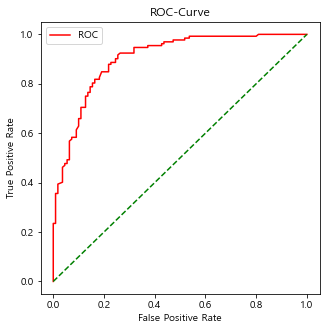

In [281]:
plt.figure(figsize=(5,5))
plt.plot(fper, tper, color='red',label='ROC')

plt.plot([0,1],[0,1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend()
plt.show()

In [282]:
roc_auc_score(train['target'],oof)

0.9025137741046833

## 9-2 Stratified K-Fold Cross Validation

train-test split 시 옵션으로 넣었던 stratified 과 유사합니다.

target 내의 특정 class가 Fold내에 유난히 많은 경우 정확한 학습이 이뤄지기 어렵고, 때문에 정확한 성능 측정이 어렵습니다.

StratifiedKFold는 target 속성값의 개수를 동일하게 만들어서 한 Fold 내에 특정 class가 몰리는 것을 방지합니다.

<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_009.png>

출처: https://scikit-learn.org/stable/modules/cross_validation.html

In [289]:
from sklearn.model_selection import StratifiedKFold

<div class="alert alert-block alert-warning">
    <b>Quiz</b> StratifiedKFold를 활용하여 하이퍼파라미터를 튜닝하고 test AUC를 구해보세요
</div>

## 9-3 GroupKFold

train 과 validation set 을 분할시 같은 특정 그룹이 분할되는 것을 방지하는 방법입니다. 
예를 들어 환자별로 10번씩 x-ray를 찍었다고 가정하면, 동일한 환자의 기록이 train 과 validation에 분리되는 경우 이미 train에서 해당 환자의 특징이 학습되었기 때문에 validation 성능이 올라갈 수 있습니다. 

이런 경우 모델을 실제로 활용시 예측한 성능보다 낮은 결과를 볼 가능성이 높습니다.

GroupKFold는 이런 과적합 상황을 탐지하여 robust한 모델을 만들 수 있습니다.


<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_007.png>

<div class="alert alert-block alert-warning">
    <b>Quiz</b> GroupKFold를 활용하여 하이퍼파라미터를 튜닝하고 test AUC를 구해보세요.
</div>

In [297]:
from sklearn.model_selection import GroupKFold


# 11. Feature engineering

머신러닝에서 컴퓨터가 스스로 학습하려면, 데이터를 컴퓨터가 인지할 수 있도록 사람이 잘 만들어줘야 합니다.

모델보다 중요한 것은 중요한 feature를 찾는 것이라고 할 수도 있습니다.

정확한 예측을 위해서는 입력이 중요합니다.

- Imputation (결측치 처리)
- Outliers (이상치 탐지)
- Binning (구간화) :  연속형 변수를 특정 구간으로 나눠 범주형 변수로 변환하는 방법
- Transform (ex. log transform): 편향된 데이터 분포를 정규분포에 가깝게 만들어서 이상치의 영향을 줄인다
- One-hot encoding
- Groupby feature
- Feature Split
- Extracting Data
- feature interaction (aka 사칙연산): 변수를 결합하여 새로운 변수 생성
- Dimension Reduction


## 11-1 Feature Interaction

feature 간의 연산을 통해 새로운 feature를 만들 수 있습니다.

- 현재 나이

<div class="alert alert-block alert-warning">
    <b>Quiz</b> 출생년도를 이용해서 현재 나이를 새로운 feature로 추가해보세요
</div>